In [1]:
from cobra.io import read_sbml_model
from cobra import Metabolite, Reaction
import cobra
model = read_sbml_model('GSM_A.niger.xml')

'' is not a valid SBML 'SId'.


- Hexanoyl-coA (HcoA) - C27H46N7O17P3S - in model
- Olivetolic Acid (OA) - C12H16O4 - add
- (IPP) Isopentenyl pyrophosphate (IPP, isopentenyl diphosphate, or IDP) - 	C5H12O7P2 - in model
- Dimethylallyl pyrophosphate (DMAPP) -  C5H12O7P2 - add
- Geranyl diphosphate (GPP) - C10H20O7P2 - in model 
- Cannabigerolic acid (CBGA) - C22H32O4 - add
- Tetrahydrocannabinolic acid (THCA) - C22H30O4 -add
- Malonyl_CoA  - in model

Reactions 

- Hexanoyl-coA + 3 malonyl-CoA -> Olivetoic acid (OA)                                                    (1) OLS
- Dimethylallyl diphosphate (DMAPP) + IPP -> Geranyl diphosphate (GPP)       (2) GPPS
- Geranyldiphosphate (GPP) + Olivetolic acid (OA) -> cannabigerolic acid (CBGA)                          (3) CBGAS
- cannabigerolic acid (CBGA) -> Tetrahydrocannabinolic acid (THCA)                                       (4) THCAS
- Tetrahydrocannabinolic acid (THCA) ->                                             (5) Export
-  IPP -> DMPP                                                                       (6) evenwicht

Enzymes
- Olivetol synthase (OLS)        Gene:   OC115699293
- Olivetolic acid cyclase (OAC)  Gene:   OC115723438 
- CBGA synthase (CBGAS)          Gene:   PT4-T
- THCA synthase (THCAS) 	     Gene:   SAPIO_CDS2003
- GPP synthase (GPPS)            Gene:   ERG20 (S. cerevisiea)
- Isopentenyl-diphosphate isomerase Gene: fcd1 (Solanum lycopersicum)

In [2]:
for metabolite in model.metabolites:
    print (f'{metabolite.name} , {metabolite.id}')


1,3-beta-D-Glucan , 13GLUCAN
1,3-Bisphospho-D-glycerate , 13PDG
1,4-alpha-D-Glucan , 14GLUCAN
2-Dehydro-3-deoxy-D-galactonate , 2D3DGALT
2-Hydroxyphenylacetic acid , 2HPAC
2-Maleylacetate , 2MAC
2-methyl aconitate , 2MACOm
2-methyl citrate , 2MCITm
2-methyl isocitrate , 2MICITm
2-Phospho-D-glycerate , 2PG
Gallic acid , 345THBe
3-Carboxy-cis,cis-muconate , 3CMUCO
3-cyanopyridine , 3CPYRD
3-cyanopyridine (extracellular) , 3CPYRDe
2-Dehydro-3-deoxy-D-arabino-heptonate 7-phosphate , 3DDAH7P
3-Fumarylpyruvate , 3FPYR
3-Hydroxybenzoate , 3HBA
3-Hydroxybenzoate (extracellular) , 3HBAe
Indoxyl , 3HIND
3-Maleylpyruvate , 3MPYR
3-Oxoadipate , 3OA
3-Oxoadipyl-CoA , 3OACOAm
3-Oxoadipate (mitochondrial) , 3OAm
3-Phospho-D-glycerate , 3PG
3-Phosphoserine , 3PSER
5-O-(1-Carboxyvinyl)-3-phosphoshikimate , 3PSME
3-Carboxymuconolactone , 3CMUCL
4-Hydroxybenzoic acid , 4HBA
4-Hydroxybenzaldehyde , 4HBAL
4-Hydroxybenzoylformate , 4HBFOR
4-Hydroxymandelate , 4HMAND
4-Hydroxyphenylacetic acid , 4HPAC
3-(4-H

In [3]:
olivetolic_acid = cobra.core.Metabolite(id = 'OA', formula = 'C12H16O4', name = 'Olivetolic Acid', charge = 0, compartment = 'c')
dmapp = cobra.core.Metabolite(id = 'DMAPP', formula = 'C5H12O7P2', name = 'Dimethylallyl diphosphate', charge = 0, compartment = 'c')
cannabigerolic_acid= cobra.core.Metabolite(id = 'CBGA', formula = 'C22H32O4', name = 'Cannabigerolic Acid', charge = 0, compartment = 'c')
tetrahydrocannabinolic_acid  = cobra.core.Metabolite(id = 'THCA', formula = 'C22H30O4', name = 'Tetrahydrocannabinolic acidt', charge = 0, compartment ='c')

hexanoyl_coA =model.metabolites.get_by_id('C60COA')
malonyl_CoA = model.metabolites.get_by_id('MALCOA')
isopentenyl = model.metabolites.get_by_id('IPPP')
geranyl = model.metabolites.get_by_id('GPP')


model.add_metabolites(olivetolic_acid)
model.add_metabolites(dmapp)
model.add_metabolites(cannabigerolic_acid)
model.add_metabolites(tetrahydrocannabinolic_acid)

print(str(model.metabolites))


[<Metabolite 13GLUCAN at 0x1d291f07f50>, <Metabolite 13PDG at 0x1d2ffd2d5d0>, <Metabolite 14GLUCAN at 0x1d291f07dd0>, <Metabolite 2D3DGALT at 0x1d291f07d10>, <Metabolite 2HPAC at 0x1d291f07a90>, <Metabolite 2MAC at 0x1d291f07750>, <Metabolite 2MACOm at 0x1d291f07510>, <Metabolite 2MCITm at 0x1d291f072d0>, <Metabolite 2MICITm at 0x1d291f06fd0>, <Metabolite 2PG at 0x1d291f06d50>, <Metabolite 345THBe at 0x1d291f07850>, <Metabolite 3CMUCO at 0x1d291f06a90>, <Metabolite 3CPYRD at 0x1d2930854d0>, <Metabolite 3CPYRDe at 0x1d291f06310>, <Metabolite 3DDAH7P at 0x1d291f06110>, <Metabolite 3FPYR at 0x1d291f06150>, <Metabolite 3HBA at 0x1d291f05e10>, <Metabolite 3HBAe at 0x1d291f05b90>, <Metabolite 3HIND at 0x1d291f05c50>, <Metabolite 3MPYR at 0x1d291f05890>, <Metabolite 3OA at 0x1d291f053d0>, <Metabolite 3OACOAm at 0x1d29157f490>, <Metabolite 3OAm at 0x1d291f04e10>, <Metabolite 3PG at 0x1d291f04b90>, <Metabolite 3PSER at 0x1d291f04990>, <Metabolite 3PSME at 0x1d291f04710>, <Metabolite 3CMUCL at 0

In [4]:
dmapps = cobra.core.Reaction(id = 'DMAPPS', name = 'Isopentenyl-diphosphate isomerase' , lower_bound = -1000 , upper_bound = 1000 )
dmapps.add_metabolites({isopentenyl : -1, dmapp:1}, reversibly = True)
dmapps.gene_reaction_rule = '(fcd1)'

gpps = cobra.core.Reaction(id = 'GPPS', name = 'Geranyl-diphosphate synthase' , lower_bound = 0 , upper_bound = 1000 )
gpps.add_metabolites({dmapp : -1, isopentenyl:-1, geranyl: 1}, reversibly = False)
gpps.gene_reaction_rule = '(ERG20)'

ols = cobra.core.Reaction(id = 'OLS', name = 'Olivetol Syntase' ,   lower_bound = 0 , upper_bound = 1000 )
ols.add_metabolites({ hexanoyl_coA : -1 , malonyl_CoA : -3, olivetolic_acid: 1}, reversibly = False)
ols.gene_reaction_rule = '(OC115699293)'

cbgas = cobra.core.Reaction(id = 'CBGAS', name = 'Cannabigerolic acid synthase' , lower_bound = 0 , upper_bound = 1000 )
cbgas.add_metabolites({geranyl : -1, olivetolic_acid : -1, cannabigerolic_acid: 1 }, reversibly = False)
cbgas.gene_reaction_rule = '(PT4-T)'

thcas = cobra.core.Reaction(id = 'THCAS', name = 'Tetrahydrocannabinolic acid synthase' ,  lower_bound = 0 , upper_bound = 1000 )
thcas.add_metabolites({cannabigerolic_acid : -1, tetrahydrocannabinolic_acid: 1}, reversibly = False)
thcas.gene_reaction_rule = '(SAPIO_CDS2003)'

thca_e = cobra.core.Reaction(id = 'THCA_e', name = 'THCA export' , lower_bound = 0 , upper_bound = 1000 )
thca_e.add_metabolites({tetrahydrocannabinolic_acid : -1}, reversibly = False)


model.add_reactions((dmapps, gpps, ols, cbgas, thcas, thca_e))

print(str(model.reactions))

[<Reaction NE1 at 0x1d29c0530d0>, <Reaction NE2 at 0x1d29c053090>, <Reaction r1 at 0x1d29c053950>, <Reaction r2 at 0x1d29c053ed0>, <Reaction r3 at 0x1d29c058310>, <Reaction r4 at 0x1d29c0582d0>, <Reaction r5a at 0x1d2eddd87d0>, <Reaction r6 at 0x1d29311a3d0>, <Reaction r7 at 0x1d29311a2d0>, <Reaction r8 at 0x1d29c0590d0>, <Reaction r9 at 0x1d29311a250>, <Reaction r10 at 0x1d29c05ae10>, <Reaction r11 at 0x1d29c05a110>, <Reaction r12a at 0x1d29c05b210>, <Reaction r13a at 0x1d29c05b7d0>, <Reaction r14 at 0x1d29c05bdd0>, <Reaction r15 at 0x1d29c05a790>, <Reaction r16a at 0x1d29c05d050>, <Reaction r17 at 0x1d29c059290>, <Reaction r18 at 0x1d29c05ec50>, <Reaction r19 at 0x1d29c05dcd0>, <Reaction r20 at 0x1d29c05f350>, <Reaction r21 at 0x1d29c0706d0>, <Reaction r22 at 0x1d29c05f950>, <Reaction r23 at 0x1d29c070f50>, <Reaction r24a at 0x1d29c071c10>, <Reaction r25 at 0x1d29c059190>, <Reaction r26 at 0x1d29c073150>, <Reaction r27 at 0x1d29c073a90>, <Reaction r28 at 0x1d29c07da50>, <Reaction r29

In [5]:
model.objective = {model.reactions.THCA_e: 1}
solution = model.optimize()
solution.fluxes.THCA_e



3.5573476702508984

In [6]:
model.medium


{'BOUNDARY_GLCe': 10.0,
 'BOUNDARY_H2Oe': 1000.0,
 'BOUNDARY_HNO3e': 1000.0,
 'BOUNDARY_O2e': 1000.0,
 'BOUNDARY_PIe': 1000.0,
 'BOUNDARY_SLFe': 1000.0,
 'BOUNDARY_Ke': 1000.0,
 'BOUNDARY_CAe': 1000.0}

4.583 C6H12O6 ->  C22H30O4 + 12.5 H2O + 5.5 CO2

In [7]:
medium = model.medium
with model:
    THCA_production = model.optimize().objective_value
    print("Max. THC production [mmol gDW^-1 h^-1]:", THCA_production)
    print("Theoretical max. yield [mmol-THC / mmol-glc]:", THCA_production / (-1*model.reactions.BOUNDARY_GLCe.flux))

Max. THC production [mmol gDW^-1 h^-1]: 3.5573476702508966
Theoretical max. yield [mmol-THC / mmol-glc]: 0.35573476702508966


In [8]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

ppp_gluc = production_envelope(model,
                    reactions=[model.reactions.BOUNDARY_GLCe],
                    objective=model.reactions.DRAIN_Biomass)

ppp_gluc

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,BOUNDARY_GLCe
0,BOUNDARY_GLCe,0.0,0.0,0.0,0.939855,0.0,0.0,-10.000000
1,BOUNDARY_GLCe,0.0,0.0,0.0,0.890389,0.0,0.0,-9.473684
2,BOUNDARY_GLCe,0.0,0.0,0.0,0.840923,0.0,0.0,-8.947368
3,BOUNDARY_GLCe,0.0,0.0,0.0,0.791457,0.0,0.0,-8.421053
4,BOUNDARY_GLCe,0.0,0.0,0.0,0.741991,0.0,0.0,-7.894737
5,BOUNDARY_GLCe,0.0,0.0,0.0,0.692525,0.0,0.0,-7.368421
6,BOUNDARY_GLCe,0.0,0.0,0.0,0.643058,0.0,0.0,-6.842105
7,BOUNDARY_GLCe,0.0,0.0,0.0,0.593592,0.0,0.0,-6.315789
8,BOUNDARY_GLCe,0.0,0.0,0.0,0.544126,0.0,0.0,-5.789474
9,BOUNDARY_GLCe,0.0,0.0,0.0,0.494660,0.0,0.0,-5.263158


In [9]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

ppp_thca = production_envelope(model,
                    reactions=[model.reactions.BOUNDARY_GLCe],
                    objective=model.reactions.THCA_e)

ppp_thca

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,BOUNDARY_GLCe
0,BOUNDARY_GLCe,0.0,0.0,0.0,3.557348,1.304361,0.707835,-10.000000
1,BOUNDARY_GLCe,0.0,0.0,0.0,3.370119,1.304361,0.707835,-9.473684
2,BOUNDARY_GLCe,0.0,0.0,0.0,3.182890,1.304361,0.707835,-8.947368
3,BOUNDARY_GLCe,0.0,0.0,0.0,2.995661,1.304361,0.707835,-8.421053
4,BOUNDARY_GLCe,0.0,0.0,0.0,2.808432,1.304361,0.707835,-7.894737
5,BOUNDARY_GLCe,0.0,0.0,0.0,2.621204,1.304361,0.707835,-7.368421
6,BOUNDARY_GLCe,0.0,0.0,0.0,2.433975,1.304361,0.707835,-6.842105
7,BOUNDARY_GLCe,0.0,0.0,0.0,2.246746,1.304361,0.707835,-6.315789
8,BOUNDARY_GLCe,0.0,0.0,0.0,2.059517,1.304361,0.707835,-5.789474
9,BOUNDARY_GLCe,0.0,0.0,0.0,1.872288,1.304361,0.707835,-5.263158


<Axes: xlabel='BOUNDARY_GLCe'>

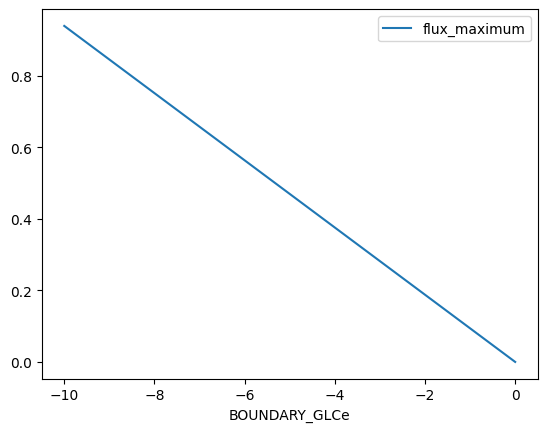

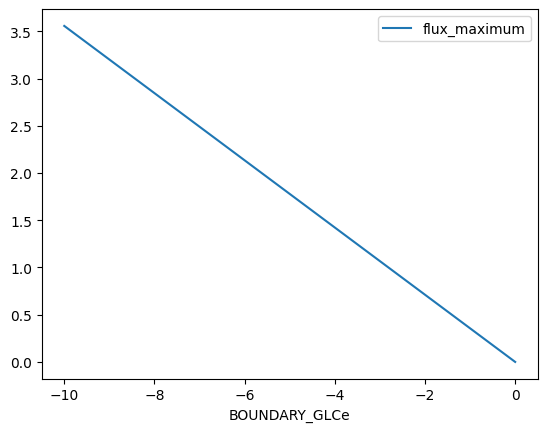

In [10]:
type(ppp_thca)
import matplotlib.pyplot as plt
ppp_gluc.plot(x="BOUNDARY_GLCe", y="flux_maximum", kind="line")
ppp_thca.plot(x="BOUNDARY_GLCe", y="flux_maximum", kind="line")

In [11]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using glucose as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_GLCe.flux)) + ' mmol / mmol glucose' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using glucose as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))
    

The THC production using glucose as a primary carbon source yields 3.56 mmol/ gDw*h
yield is equal to 0.3557347670250893 mmol / mmol glucose
The biomass production using glucose as a primary carbon source yields 0.94 mmol/ gDw*h


In [12]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_SUCCe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using Succinate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_SUCCe.flux)) + ' mmol / mmol Succinate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using Succinate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))
    


The THC production using Succinate as a primary carbon source yields 1.82 mmol/ gDw*h
yield is equal to 0.18181818181818254 mmol / mmol Succinate
The biomass production using Succinate as a primary carbon source yields 0.51 mmol/ gDw*h


In [13]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_FRUe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using fructose as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_FRUe.flux)) + ' mmol / mmol fructose' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using fructose as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))
    


The THC production using fructose as a primary carbon source yields 3.56 mmol/ gDw*h
yield is equal to 0.3557347670250882 mmol / mmol fructose
The biomass production using fructose as a primary carbon source yields 0.94 mmol/ gDw*h


In [14]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_FUMe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using fumarate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_FUMe.flux)) + ' mmol / mmol fumarate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using fumarate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using fumarate as a primary carbon source yields 1.78 mmol/ gDw*h
yield is equal to 0.17786738351254477 mmol / mmol fumarate
The biomass production using fumarate as a primary carbon source yields 0.47 mmol/ gDw*h


In [15]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_GLNe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using glutamine as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_GLNe.flux)) + ' mmol / mmol glutamine' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using glutamine as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using glutamine as a primary carbon source yields 2.67 mmol/ gDw*h
yield is equal to 0.2668010752688188 mmol / mmol glutamine
The biomass production using glutamine as a primary carbon source yields 0.78 mmol/ gDw*h


In [16]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_GLUe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using glutamate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_GLUe.flux)) + ' mmol / mmol glutamate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using glutamate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using glutamate as a primary carbon source yields 2.67 mmol/ gDw*h
yield is equal to 0.26680107526881414 mmol / mmol glutamate
The biomass production using glutamate as a primary carbon source yields 0.78 mmol/ gDw*h


In [17]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_SUCe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using sucrose as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_SUCe.flux)) + ' mmol / mmol glutamate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using sucrose as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using sucrose as a primary carbon source yields 7.11 mmol/ gDw*h
yield is equal to 0.7114695340501729 mmol / mmol glutamate
The biomass production using sucrose as a primary carbon source yields 1.88 mmol/ gDw*h


In [18]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_LACe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using lactate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_LACe.flux)) + ' mmol / mmol glutamate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using lactate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using lactate as a primary carbon source yields 1.71 mmol/ gDw*h
yield is equal to 0.17062425328554373 mmol / mmol glutamate
The biomass production using lactate as a primary carbon source yields 0.45 mmol/ gDw*h


In [19]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_MALe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using malate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_MALe.flux)) + ' mmol / mmol glutamate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using malate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using malate as a primary carbon source yields 1.78 mmol/ gDw*h
yield is equal to 0.17786738351254575 mmol / mmol glutamate
The biomass production using malate as a primary carbon source yields 0.47 mmol/ gDw*h


In [20]:
medium = model.medium
with model: 
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_PYRe'] = 10
    model.medium = medium
    solution = model.optimize()
    thc_production = model.optimize().objective_value
    print('The THC production using pyruvate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(thc_production))
    print('yield is equal to ' + str(thc_production / (-1* model.reactions.BOUNDARY_PYRe.flux)) + ' mmol / mmol glutamate' )
    model.objective = model.reactions.DRAIN_Biomass
    solution = model.optimize()
    biomass_production = model.optimize().objective_value
    print('The biomass production using pyruvate as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(biomass_production))

The THC production using pyruvate as a primary carbon source yields 1.48 mmol/ gDw*h
yield is equal to 0.1482228195937888 mmol / mmol glutamate
The biomass production using pyruvate as a primary carbon source yields 0.39 mmol/ gDw*h


OptGene

In [21]:
from cameo.strain_design.heuristic.evolutionary_based import OptGene

optgene = OptGene(model)

result = optgene.run(target=model.reactions.THCA_e, 
                     biomass=model.reactions.DRAIN_BIOMASS,
                     substrate=model.metabolites.GLC,
                     max_evaluations=20000, population_size=200, max_knockouts=5,
                     plot=False, growth_coupled=True)

result

ImportError: cannot import name 'Mapping' from 'collections' (c:\Users\lwdeg\AppData\Local\Programs\Python\Python311\Lib\collections\__init__.py)

OptKnock

In [ ]:
from cameo.strain_design.deterministic.linear_programming import OptKnock

optknock = OptKnock(model)

result = op
resulttknock.run(max_knockouts=3, target="THCA_e", biomass="DRAIN_Biomass")

result.plot(0)

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\Lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\markupsafe\__init__.py)

Cofactor swap targets

In [ ]:
from cameo.strain_design.heuristic.evolutionary_based import CofactorSwapOptimization
from cameo.strain_design.heuristic.evolutionary.objective_functions import product_yield

from cameo.strain_design.heuristic.evolutionary.optimization import CofactorSwapOptimization, NADH_NADPH


model.solver = "glpk"
biomass = model.reactions.DRAIN_Biomass
biomass.lower_bound = 0.1
demand = model.reactions.DM_psi
model.objective = demand

product_yield = product_yield(demand, model.reactions.BOUNDARY_GLCe)

CofactorSwapOptimization?

swap_opt = CofactorSwapOptimization(model=model, objective_function=product_yield, plot=True, cofactor_id_swaps=(['NADP', 'NADPH'], ['NAD', 'NADH']))

result = swap_opt.run(max_size=5)

result

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\Lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\markupsafe\__init__.py)

Dynamic flux based analysis

In [ ]:
from dfba import DfbaModel, ExchangeFlux, KineticVariable
from dfba.plot.matplotlib import *

model.objective = model.reactions.THCA_e
model.optimize();

model.solver = "glpk"
dfba_model = DfbaModel(model)


X = KineticVariable("Biomass")
Glc = KineticVariable("Glucose")
Psi = KineticVariable("Psilocybin")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Glc, Psi, Oxy])


mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
v_Psi = ExchangeFlux("psiM")
v_O = ExchangeFlux("BOUNDARY_O2e")

dfba_model.add_exchange_fluxes([mu, v_G, v_Psi, v_O])


dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X)
dfba_model.add_rhs_expression("Psilocybin", v_Psi * 284.25/1000.0 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant

dfba_model.add_exchange_flux_lb("BOUNDARY_GLCe", 2.5 * (Glc / (0.0027 + Glc)), Glc)
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", 15.0 * (Oxy / (0.024 + Oxy)), Oxy)
dfba_model.add_exchange_flux_lb("psiM", 0.7 * (Psi / (0.3 + Psi)), Psi)       #Guesstimates based on trp


with model:
    dfba_model.add_initial_conditions({"Biomass": 1, "Glucose": 20.0, "Psilocybin": 0.0, "Oxygen": 39})
    concentrations, trajectories = dfba_model.simulate(0.0, 1000.0, 0.1, ["BOUNDARY_GLCe", "psiM"])


plot_concentrations(concentrations)

plot_trajectories(trajectories)





ModuleNotFoundError: No module named 'dfba'

In [ ]:
from cobra.manipulation.delete import find_gene_knockout_reactions


ImportError: cannot import name 'find_gene_knockout_reactions' from 'cobra.manipulation.delete' (C:\Users\Lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cobra\manipulation\delete.py)

In [ ]:
cd Desktop/my_project

[WinError 3] Het systeem kan het opgegeven pad niet vinden: 'Desktop/my_project'
c:\Users\Lukas\OneDrive\DTU\Computer Aided cell-factory design\Project
